<a href="https://colab.research.google.com/github/climp-hub/LGMVIP-Data-Science/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LGMVIP TASK: Stock Market Prediction and Forecasting using Stacked LSTM

In [28]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Data Selection

In [29]:
#Load the data
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(url)
data.head() #display first 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [30]:
data.tail() #displaying last 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [31]:
data.isnull().sum() #checking for null values

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [33]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [34]:
#Sorting dataset according to date
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [35]:
#Index is not in order
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


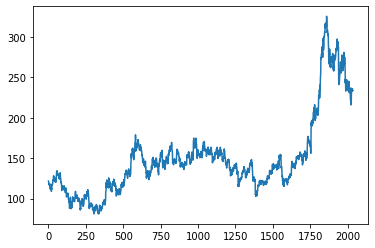

In [36]:
#Plotting the graph at Close
plt.plot(df.Close)

In [37]:
df1=df.Close

Feature Scaling

In [38]:
#importing Library
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [40]:
#Spliting data into training and test
training_size = int(len(df1) * 0.7)
test_size = len(df1) - training_size

train_data = df1[0: training_size, :]
test_data = df1[training_size: len(df1), :1]

In [41]:
training_size, test_size

(1424, 611)

In [42]:
#Converting array of values into dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [43]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, y_test = datasetCrtd(test_data, time_step)

In [44]:
print(X_train.shape),print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [50]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
#Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 10s 254ms/step - loss: 0.0126 - val_loss: 0.0015
Epoch 2/60
19/19 [==============================] - 3s 183ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/60
19/19 [==============================] - 3s 184ms/step - loss: 9.8115e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 185ms/step - loss: 9.0472e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 185ms/step - loss: 8.8135e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 197ms/step - loss: 8.5566e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 5s 239ms/step - loss: 8.6746e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 182ms/step - loss: 9.0008e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 3s 183ms/step - loss: 7.7410e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 4s 187ms/step - lo

Making predictions for training and test data

In [53]:
train_pred = scaler.inverse_transform(model.predict(X_train))
test_pred = scaler.inverse_transform(model.predict(X_test))

16/16 [==============================] - 1s 35ms/step


Calculating RMSE for train and test data

In [57]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred)), math.sqrt(mean_squared_error(y_test, test_pred))

(135.58018583012526, 210.3309945038935)

Plotting training and test predictions

In [58]:
lookback = 100
train_predPlot = np.empty_like(df)
train_predPlot[:,:] = np.nan
train_predPlot[lookback: len(train_pred) + lookback, :] = train_pred

In [60]:
test_predPlot = np.empty_like(df)
test_predPlot[:,:] = np.nan
test_predPlot[len(train_pred) + (lookback * 2) + 1:len(df) - 1, :] = test_pred

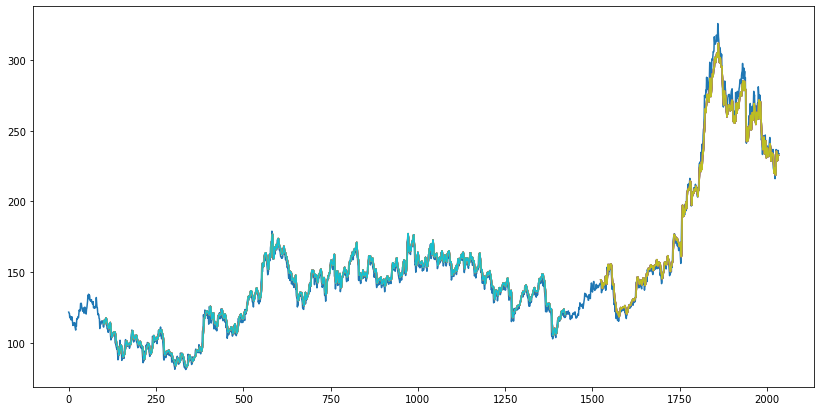

In [67]:
plt.figure(figsize=(14,7))
plt.plot(df.Close)
plt.plot(train_predPlot)
plt.plot(test_predPlot)
plt.show()